We will use a dataset about wines that's built-in into Scikit-Learn to get started with clustering.

In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [3]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#y = pd.Series(data["target"])

# Comment the different variables of this dataset
# Notice how they are all numerical - KMeans cannot deal with categorical variables
X.head()

# The scale of "proline" is much higher than the scale of many other variables!
# K-Means is a distance based algorithm: we need to scale / normalize:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Clustering

We will pick manually the number of clusters we want - let's set it to 8. Later we will discuss how many clusters should we have.

When randomness is involved (remember, K-means picks randomly the initial centroids), we better use a random seed so that we can reproduce our results. We can set this directly to the argument random_state.

In [4]:
# Clustering:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

We have run the model - now what? We can explore the clusters assigned to each observation:

In [22]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Explore the cluster assignment in the original dataset
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,3
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,11
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,12
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,3
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,15
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,15
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,4
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,6


In [21]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     11
1     10
2      5
3     17
4      9
5     21
6     12
7      9
8     12
9     11
10     4
11    14
12    15
13     4
14     2
15     9
16     3
17     7
18     3
dtype: int64

Before going into a deep exploration, we should think about the clustering itself.

Go to the documentation page of K-means and discuss the parameters with your students: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

init: those are the different initialization strategies. By default, Sklearn is already using a smart method, not the totally random one we saw.
n_init: By default, Scikit-Learn has tried 10 different random initializations and kept the best model.
How does Scikit-Learn know which model is the best? It uses a performance metric called inertia. It is the mean squared distance between each instance and its closest centroid. It's stored in the inertia_ attribute of the model.

In [6]:
kmeans.inertia_ 

938.6711756898961

How does scikit-learn know which model is best ? 

It uses a performance metric called inertia. It is the mean squared distance between each instance and its closest centroid. It's stored in the inertia_ attribute of the model.

K clusters data by trying to separate samples in n groups of equal variance, minimizing the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”).
-therefore running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

other parameters we can tweak for learning purposes (we arent going to be as smart as the scikit-learn) :-

    max_iter: It iterates up to 300 times by default (re-computing centroids iterations)

    tol: determine when to stop iterating (if the clusters have changed only very slightly, we assume we have achieved 'convergence')

    algorithm: There are variations in the implementation of most algorithms and K-Means is no exception. By default, we're using a 'smart' implementation called elkan.

In [8]:
# just an example of tweaking the parameters - not using defaults

kmeans = KMeans(n_clusters=8,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

1014.9574562487679


We have used K=8 by default for now - but we know that 8 might not be the optimal number of clusters for our dataset. Having a metric like inertia, we can compute it for several K values and then use the "elbow method" to choose the best K.

We will now leave all other parameters with their default value.

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

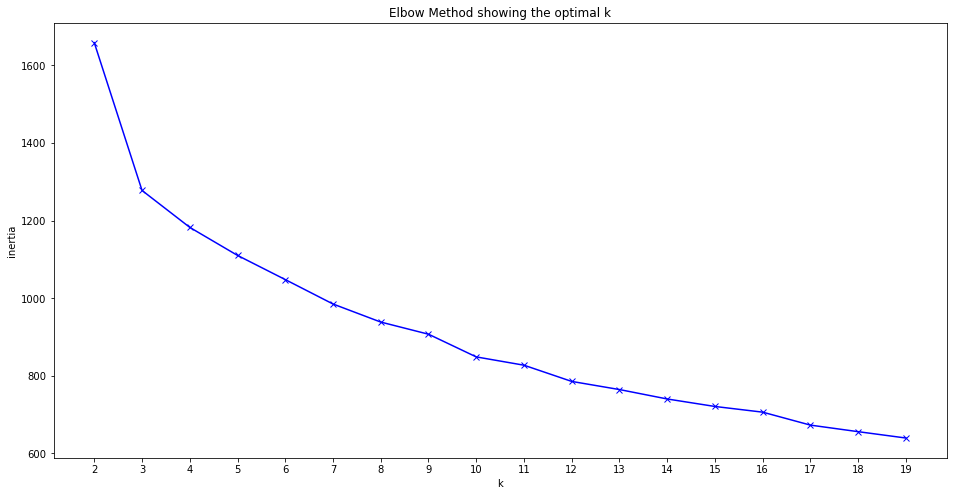

In [11]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There seems to be an elbow at k=3, and then a very slight one at k=10 but other than that the plot is quite smooth. 

you could employ another method to find optimal k between 5 and 8, plotting the silhouette score against the K.

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

The silhouette score is a metric which measures how similiar an observation is to members of its own cluster, in comparison to other. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar. 